--- Задание 1: Разведочный анализ данных ---

[1.1] Загрузка и осмотр данных...

Первые 5 строк датасета:
   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56      

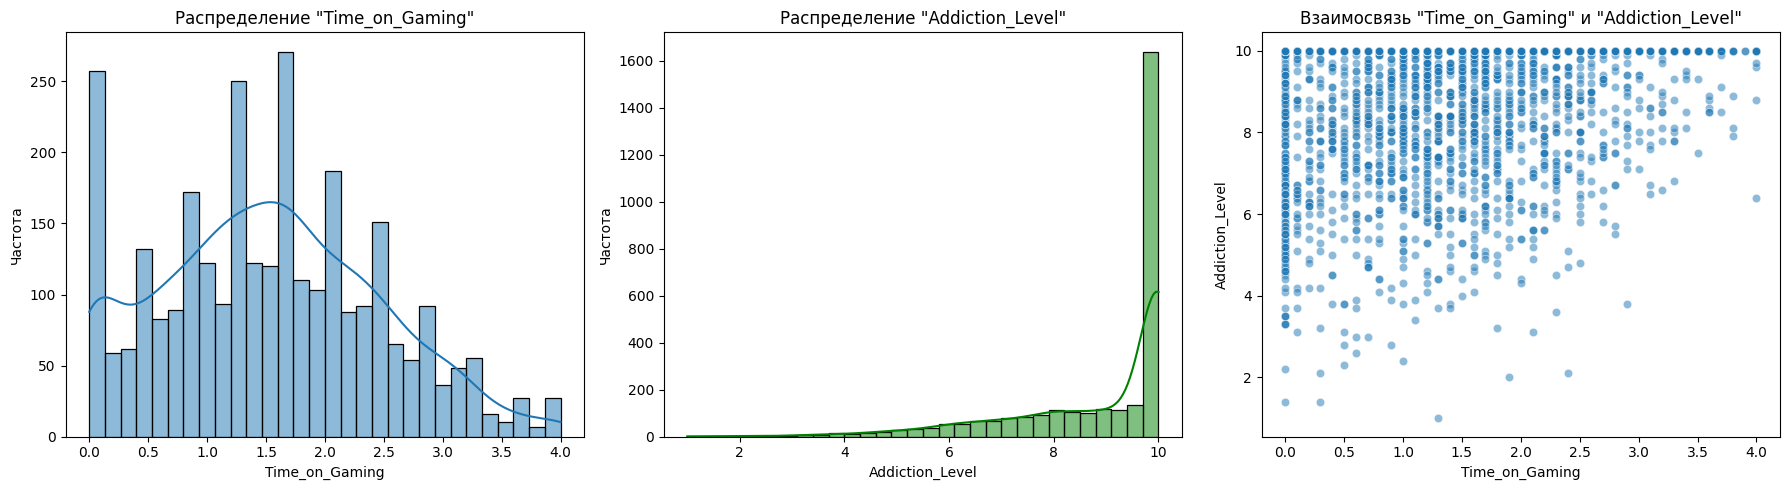


--- Задание 2: Построение и оценка моделей ---

[2.1] Разделение данных на обучающую и тестовую выборки...
Размер обучающей выборки: 2400 записей
Размер тестовой выборки: 600 записей

[2.2] Обучение и оценка Линейной регрессии...
  - MAE: 1.1899
  - MSE: 2.2979
  - R²: 0.0879

[2.3] Обучение и оценка Полиномиальной регрессии (degree=2)...
  - MAE: 1.1883
  - MSE: 2.2944
  - R²: 0.0893

[2.4] Обучение и оценка K-ближайших соседей (n=5)...
  - MAE: 1.1967
  - MSE: 2.5968
  - R²: -0.0308

--- Задание 3: Сравнение моделей ---

[3.1] Визуализация предсказаний моделей...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


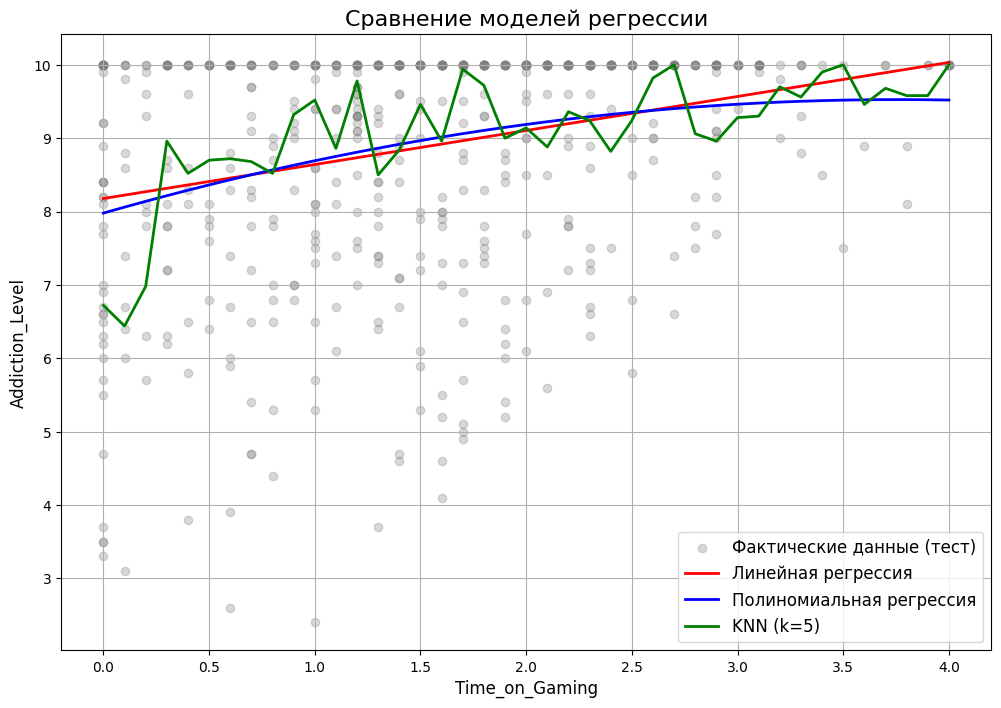


[3.2] Сравнительная таблица метрик моделей:
                     Модель     MAE     MSE      R²
0        Линейная регрессия  1.1899  2.2979  0.0879
1  Полиномиальная регрессия  1.1883  2.2944  0.0893
2                 KNN (k=5)  1.1967  2.5968 -0.0308


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================================================================
# Задание 1: Разведочный анализ данных (EDA)
# =============================================================================
print("--- Задание 1: Разведочный анализ данных ---")

print("\n[1.1] Загрузка и осмотр данных...")
df = pd.read_csv('/content/sample_data/teen_phone_addiction_dataset.csv')

print("\nПервые 5 строк датасета:")
print(df.head())

print("\nИнформация о датасете:")
df.info()

print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

print("\nОписательные статистики:")
print(df.describe())

print("\n[1.2] Выбор переменных...")

N = 12

cols = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
    'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming',
    'Time_on_Education'
]
X_col = cols[N % 7]
y_col = 'Addiction_Level'

print(f"Ваш порядковый номер: N = {N}")
print(f"Выбранный признак (X): '{X_col}'")
print(f"Целевая переменная (y): '{y_col}'")

print("\n[1.3] Визуализация данных...")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df[X_col], kde=True, bins=30)
plt.title(f'Распределение "{X_col}"')
plt.xlabel(X_col)
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot(df[y_col], kde=True, bins=30, color='green')
plt.title(f'Распределение "{y_col}"')
plt.xlabel(y_col)
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df[X_col], y=df[y_col], alpha=0.5)
plt.title(f'Взаимосвязь "{X_col}" и "{y_col}"')
plt.xlabel(X_col)
plt.ylabel(y_col)

plt.tight_layout()
plt.show()

# =============================================================================
# Задание 2: Построение и оценка моделей
# =============================================================================
print("\n--- Задание 2: Построение и оценка моделей ---")

print("\n[2.1] Разделение данных на обучающую и тестовую выборки...")
X = df[[X_col]]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Размер обучающей выборки: {X_train.shape[0]} записей")
print(f"Размер тестовой выборки: {X_test.shape[0]} записей")

print("\n[2.2] Обучение и оценка Линейной регрессии...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"  - MAE: {mae_linear:.4f}")
print(f"  - MSE: {mse_linear:.4f}")
print(f"  - R²: {r2_linear:.4f}")

print("\n[2.3] Обучение и оценка Полиномиальной регрессии (degree=2)...")
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"  - MAE: {mae_poly:.4f}")
print(f"  - MSE: {mse_poly:.4f}")
print(f"  - R²: {r2_poly:.4f}")

print("\n[2.4] Обучение и оценка K-ближайших соседей (n=5)...")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"  - MAE: {mae_knn:.4f}")
print(f"  - MSE: {mse_knn:.4f}")
print(f"  - R²: {r2_knn:.4f}")

# =============================================================================
# Задание 3: Сравнение моделей и визуализация
# =============================================================================
print("\n--- Задание 3: Сравнение моделей ---")

print("\n[3.1] Визуализация предсказаний моделей...")
X_test_sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[X_test_sorted_indices]

y_pred_linear_sorted = linear_model.predict(X_test_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_sorted)
y_pred_knn_sorted = knn_model.predict(X_test_sorted)

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, alpha=0.3, label='Фактические данные (тест)', color='gray')
plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Линейная регрессия')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='blue', linewidth=2, label='Полиномиальная регрессия')
plt.plot(X_test_sorted, y_pred_knn_sorted, color='green', linewidth=2, label='KNN (k=5)')

plt.title('Сравнение моделей регрессии', fontsize=16)
plt.xlabel(X_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print("\n[3.2] Сравнительная таблица метрик моделей:")
metrics_df = pd.DataFrame({
    'Модель': ['Линейная регрессия', 'Полиномиальная регрессия', 'KNN (k=5)'],
    'MAE': [mae_linear, mae_poly, mae_knn],
    'MSE': [mse_linear, mse_poly, mse_knn],
    'R²': [r2_linear, r2_poly, r2_knn]
})

print(metrics_df.round(4))